# Feature Extraction


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from scipy import stats


### Data Exploration


#### Statistical Exploration


In [18]:
def explore_statistically(dataframe: pd.DataFrame):
    print(dataframe.describe(include='all'))
    print(dataframe.info())


In [19]:
def get_values_count(dataframe: pd.DataFrame):
    for col in dataframe.select_dtypes(include='object').columns:
        print(dataframe[col].value_counts())


#### Visual Exploration


In [20]:
def plot_histograms(df: pd.DataFrame):
    '''Plot histograms for numeric columns.'''
    df.select_dtypes(include='number').hist(figsize=(12, 10))
    plt.suptitle('Histograms of Numeric Columns')
    plt.show()


In [21]:
def plot_box_plots(df: pd.DataFrame):
    '''Plot box plots for numeric columns.'''
    for col in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()


In [22]:
def plot_bar_plots(df: pd.DataFrame):
    '''Plot bar plots for categorical columns.'''
    for col in df.select_dtypes(include='object').columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Plot of {col}')
        plt.show()


In [23]:
def plot_scatter_plot(df: pd.DataFrame, x_col: str, y_col: str):
    '''Plot scatter plot between two numeric columns.'''
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatter Plot between {x_col} and {y_col}')
    plt.show()


In [24]:
def plot_pair_plots(df: pd.DataFrame):
    '''Plot pair plots for all numeric columns.'''
    sns.pairplot(df.select_dtypes(include='number'))
    plt.show()


In [25]:
def plot_time_series(df: pd.DataFrame, date_col: str, value_col: str):
    '''Plot time series data.'''
    df[date_col] = pd.to_datetime(df[date_col])
    plt.figure(figsize=(12, 6))
    plt.plot(df[date_col], df[value_col])
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel(value_col)
    plt.show()


In [27]:
def perform_tsne(df: pd.DataFrame):
    '''Perform t-SNE and plot the result.'''
    numeric_df = df.select_dtypes(include='number').fillna(0)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
    plt.title('t-SNE Result')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()


In [35]:
def perform_knn(df: pd.DataFrame, target_col: str):
    '''Perform k-NN classification and print classification report.'''
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in DataFrame.")
    
    # Prepare data
    X = df.drop(columns=[target_col])
    y = df[target_col]


    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train k-NN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    print("k-NN Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [29]:
def perform_statistical_test(df: pd.DataFrame, group_col: str, value_col: str):
    '''Perform a t-test between two groups.'''
    group1 = df[df[group_col] == 'A'][value_col]
    group2 = df[df[group_col] == 'B'][value_col]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    print(f'T-statistic: {t_stat}, P-value: {p_value}')


### Test


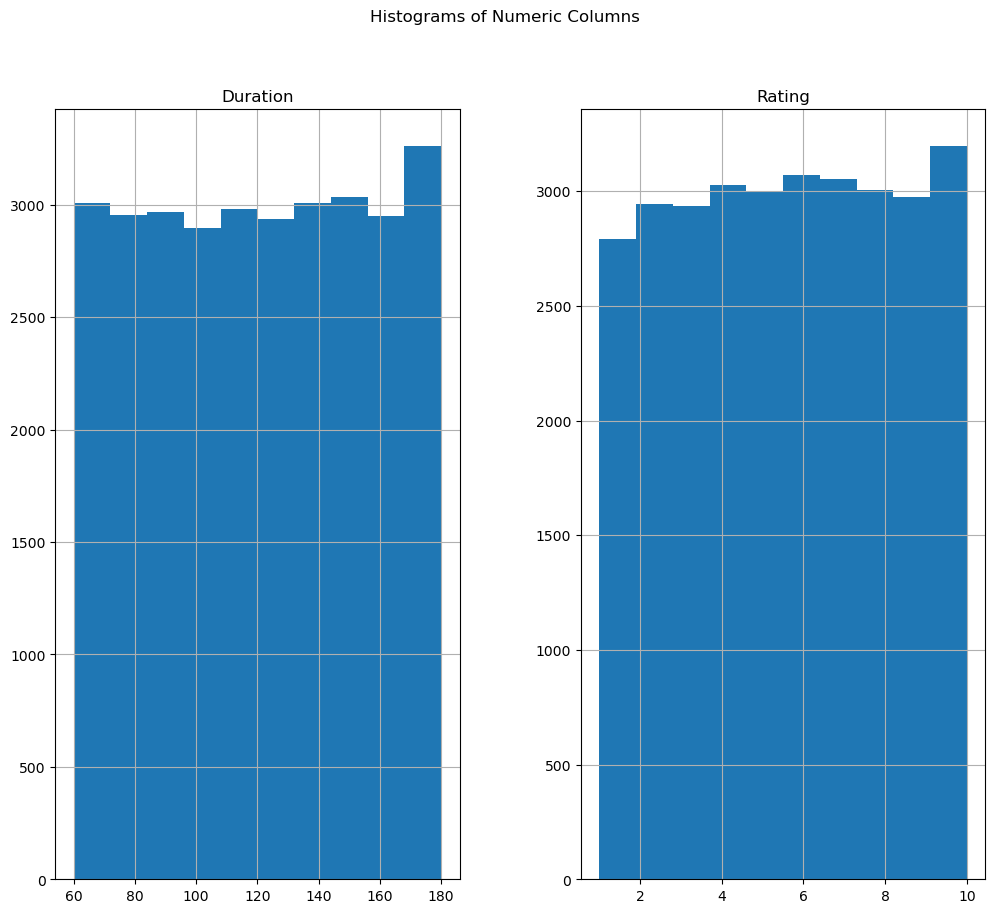

In [38]:
df = pd.read_csv("dataset/movies.csv")
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

plot_histograms(df)
